# COVID-19 Analysis Preparation and Plotting

In [154]:
# Import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## first data file

In [153]:
# Read csv file
# Coronavirus Source Data by Hannah Ritchie
# https://ourworldindata.org/coronavirus-source-data
mf = pd.read_csv("data/owid-covid-data.csv")
mflen = len(mf)
print(mflen)
print(mf.columns)

mf1 = mf[mf['location'] == 'Bulgaria']   # extract only data for Bulgaria
mf1len = len(mf1)
print(mf1len)

del mf

57808
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'total_vaccinations_per_hundred', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older

In [54]:
mp1 = mf1.copy(deep=True)
mp1len = len(mp1)
print(mp1len)

mp1.index = range(mp1len)   # reindexing from (7652,7952) to (0,300)

mp1.tail(5)

301


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
296,BGR,Europe,Bulgaria,2020-12-29,199491.0,1438.0,745.714,7405.0,154.0,75.143,...,18563.307,1.5,424.688,5.81,30.1,44.4,NaN,7.454,75.05,0.813
297,BGR,Europe,Bulgaria,2020-12-30,201220.0,1729.0,762.000,7515.0,110.0,76.714,...,18563.307,1.5,424.688,5.81,30.1,44.4,NaN,7.454,75.05,0.813
298,BGR,Europe,Bulgaria,2020-12-31,202266.0,1046.0,801.143,7576.0,61.0,79.000,...,18563.307,1.5,424.688,5.81,30.1,44.4,NaN,7.454,75.05,0.813
299,BGR,Europe,Bulgaria,2021-01-01,202540.0,274.0,803.571,7604.0,28.0,75.857,...,18563.307,1.5,424.688,5.81,30.1,44.4,NaN,7.454,75.05,0.813
300,BGR,Europe,Bulgaria,2021-01-02,202880.0,340.0,785.143,7644.0,40.0,74.429,...,18563.307,1.5,424.688,5.81,30.1,44.4,NaN,7.454,75.05,0.813


In [59]:
# select a part of the columns
mp2 = mp1[[
        'date', 
        'total_cases', 'new_cases', 'new_cases_smoothed', 
        'total_deaths', 'new_deaths', 'new_deaths_smoothed', 
        'new_cases_per_million',
        'reproduction_rate', 
        'hosp_patients',
        'total_tests', 'new_tests',
        'positive_rate',
        'total_vaccinations',
        'human_development_index']]
#mp2.columns

# changing some of columns names to shorter
mp3 = mp2[[
        'date', 
        'new_cases', 'new_cases_smoothed', 
        'new_deaths', 'new_deaths_smoothed', 
        'new_tests',
        'total_vaccinations',
        'human_development_index']]

mp3.rename(columns = {
        'new_cases_smoothed' : 'new_cases_sm', 
        'new_deaths_smoothed' : 'new_deaths_sm', 
        'total_vaccinations' : 'vacc',
        'human_development_index' : 'hum-dev-idx' ,
}, inplace = True)

mp3.columns

Index(['date', 'new_cases', 'new_cases_sm', 'new_deaths', 'new_deaths_sm',
       'new_tests', 'vacc', 'hum-dev-idx'],
      dtype='object')

In [150]:
mp3[-6:-1]

,date,new_cases,new_cases_sm,new_deaths,new_deaths_sm,new_tests,vacc,hum-dev-idx
295,2020-12-28,337.0,797.286,87.0,69.429,2809.0,NaN,0.813
296,2020-12-29,1438.0,745.714,154.0,75.143,2367.0,1719.0,0.813
297,2020-12-30,1729.0,762.000,110.0,76.714,8076.0,4608.0,0.813
298,2020-12-31,1046.0,801.143,61.0,79.000,8473.0,NaN,0.813
299,2021-01-01,274.0,803.571,28.0,75.857,5738.0,4739.0,0.813


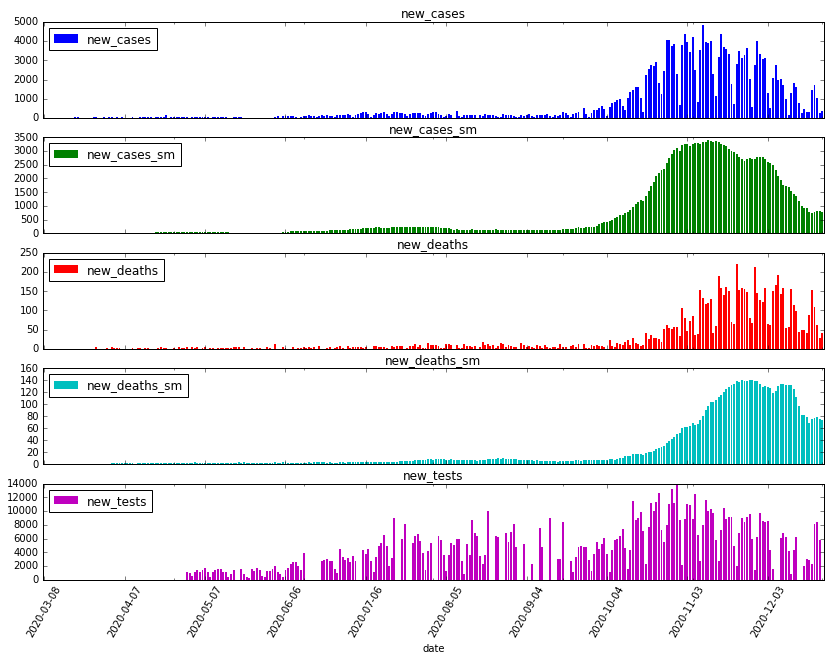

In [157]:
mp5 = mp3[['date', 'new_cases', 'new_cases_sm', 'new_deaths', 'new_deaths_sm', 'new_tests']]
ax = mp5.plot.bar(x='date',rot=60, figsize=(14, 10), width=0.75, grid=False, subplots=True, edgecolor='none')
ax[2].legend(loc=2)
plt.xticks(mp5.index,mp5['date'][::30].values)
plt.locator_params(axis='x', nbins=10)

## second data file

In [83]:
# Read csv file
# https://data.egov.bg/data/resourceView/e59f95dd-afde-43af-83c8-ea2916badd19
# df = pd.read_csv("data/Обща статистика за разпространението_2020-12-23_v146.csv")
df = pd.read_csv("data/Обща статистика за разпространението_2020-12-29_v152.csv")
dflen = len(df)
print(dflen)

207


In [84]:
# select a part of the columns
df2 = df[
    ['Дата', 'Тестове за денонощие','Нови случаи за денонощие',
     'Хоспитализирани', 'В интензивно отделение', 
     'Излекувани за денонощие', 'Починали за денонощие']
]
# change the column names
df2.rename(columns = {
    'Дата':'Date', 
    'Тестове за денонощие':'Tests',
    'Нови случаи за денонощие':'NewCases',
    'Хоспитализирани':'Hospital', 
    'В интензивно отделение':'Intensive', 
    'Излекувани за денонощие':'Cured', 
    'Починали за денонощие':'Deads',
}, inplace = True)

print(df2.columns)
df2.tail(3)

Index(['Date', 'Tests', 'NewCases', 'Hospital', 'Intensive', 'Cured', 'Deads'], dtype='object')


,Date,Tests,NewCases,Hospital,Intensive,Cured,Deads
204,2020/12/27,1759,469,5545,523,876,50
205,2020/12/28,1905,332,5571,523,1266,41
206,2020/12/29,1012,337,5511,504,1475,87


In [85]:
p1 = df2.copy(deep=True)
p2 = pd.DataFrame(data=None, columns=df2.columns)
p2

,Date,Tests,NewCases,Hospital,Intensive,Cured,Deads


In [86]:
# summing of the columns data by weeks
for i in range(4,dflen,7):
    ppcases = df2.loc[i-4:i+3,'NewCases'].sum()
    p2.loc[i//7,'NewCases'] = ppcases // 7
    
    pptests = df2.loc[i-4:i+3,'Tests'].sum()
    p2.loc[i//7,'Tests'] = pptests // 7
    
    ppdeads = df2.loc[i-4:i+3,'Deads'].sum()
    p2.loc[i//7,'Deads'] = ppdeads // 7
    
    p2.loc[i//7,'Rate'] = (ppcases * 100) // pptests
    
    p2.loc[i//7,'Date'] = df2.loc[i,'Date']

In [87]:
p3 = p2[['Date','Tests','NewCases','Deads','Rate']]
p3.tail(3)

,Date,Tests,NewCases,Deads,Rate
26,2020/12/09,8364.0,3210.0,151.0,38.0
27,2020/12/16,6684.0,2208.0,155.0,33.0
28,2020/12/23,4348.0,1232.0,104.0,28.0


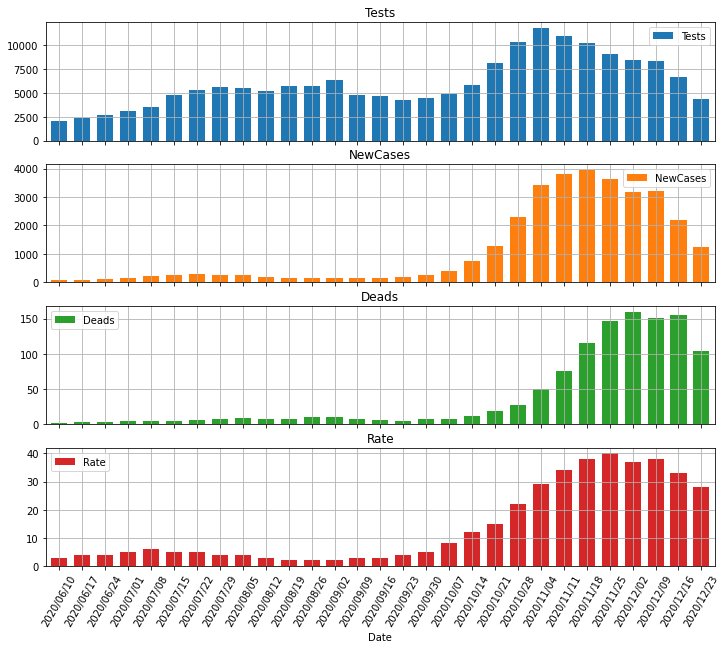

In [88]:
axes = p3.plot.bar(x='Date',rot=60, figsize=(12, 10), width=0.7, grid=True, subplots=True)
plt.xticks(rotation=60)
axes[2].legend(loc=2)

#plt.savefig('covid-19_2020.png', dpi=200)

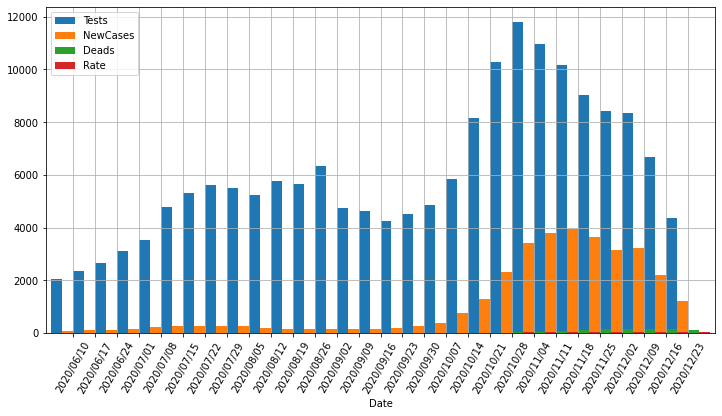

In [13]:
ax = p3.plot.bar(figsize=(12, 6), x='Date',rot=60, width=2, grid=True)
ax.legend(loc=2)

#plt.xticks(p3.index,p3["Date"].values)
ax.set_xticks(ax.get_xticks())

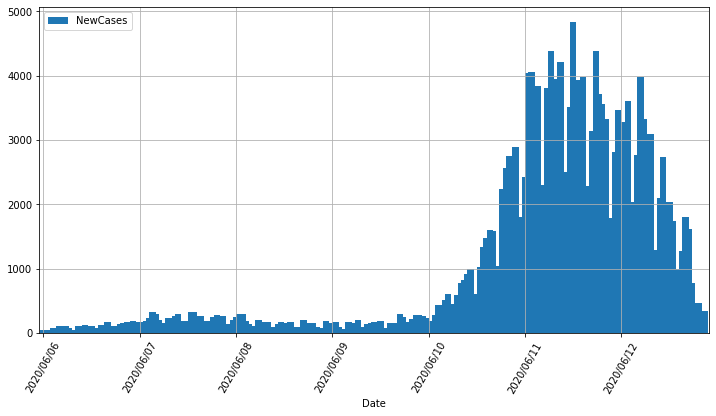

In [14]:
p5 = df2[['Date','NewCases']]
bx = p5.plot.bar(figsize=(12, 6), x='Date', rot=60, width=2, grid=True)
bx.legend(loc=2)
#plt.xticks(p5.index,p5["Date"][0::30].values)
bx.set_xticks(bx.get_xticks()[0::30])